In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
songs = pd.read_csv('songs_normalize.csv')

In [24]:
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [25]:
# check the data type
songs.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [26]:
# check null values
songs.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [27]:
#check shape
songs.shape

(2000, 18)

In [28]:
# create X and y
X = songs.drop(['artist','song','genre'],axis = 1)
y = songs['genre']

In [29]:
y

0                    pop
1              rock, pop
2           pop, country
3            rock, metal
4                    pop
              ...       
1995                 pop
1996                 pop
1997    hip hop, country
1998                 pop
1999             hip hop
Name: genre, Length: 2000, dtype: object

In [30]:
# changing the car categories into to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# now defime our categorical features
categorical_features  = ['explicit']
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                 remainder= 'passthrough')   # will take in a turple
                                 
                                 
transformed_X = transformer.fit_transform(X)
transformed_X    # this is X that has undergone cleaning

array([[1.00000e+00, 0.00000e+00, 2.11160e+05, ..., 3.55000e-01,
        8.94000e-01, 9.50530e+01],
       [1.00000e+00, 0.00000e+00, 1.67066e+05, ..., 6.12000e-01,
        6.84000e-01, 1.48726e+02],
       [1.00000e+00, 0.00000e+00, 2.50546e+05, ..., 2.51000e-01,
        2.78000e-01, 1.36859e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 2.00593e+05, ..., 2.74000e-01,
        8.11000e-01, 9.79840e+01],
       [1.00000e+00, 0.00000e+00, 1.71029e+05, ..., 2.22000e-01,
        3.47000e-01, 1.02998e+02],
       [1.00000e+00, 0.00000e+00, 2.15280e+05, ..., 8.63000e-02,
        5.53000e-01, 1.20042e+02]])

## **Find out if the features are enoght to predict genre**
To train ,predict and evaluate how accurate the features preduct the target which is the genre**

# workflow
1. import the model
2. create seed
3. train and split
4. fit the model
6. predict
7. evaluate

In [50]:
# import model
from sklearn.ensemble import RandomForestClassifier

# create random seed
np.random.seed(42)

# train and split
from sklearn.model_selection import train_test_split
transformed_X_train, transformed_X_test, y_train, y_test = train_test_split(transformed_X,y,test_size = 0.2)

# fit the model
clf= RandomForestClassifier()
clf.fit(transformed_X_train, y_train)


# Evaluation of the model for accuracy
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

print(f'Training Score:{clf.score(transformed_X_train, y_train)}') # inbuilt accuracy score

print(f'Test Score: {clf.score(transformed_X_test, y_test)}')     # inbuilt accuracy score

print(f"Classifier Cross Validation_Score: {np.mean(cross_val_score(clf,transformed_X,y,cv= 5))}") # cross validation

print(f'Accuracy_score_metric : {accuracy_score(y_test, y_preds)}')# for classifications only

Training Score:1.0
Test Score: 0.405


C:\Users\godwi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Classifier Cross Validation_Score: 0.2485
Accuracy_score_metric : 0.405


In [32]:
pd.DataFrame(transformed_y)

,0
0,"(0, 30)\t1.0"
1,"(0, 54)\t1.0"
2,"(0, 36)\t1.0"
3,"(0, 53)\t1.0"
4,"(0, 30)\t1.0"
...,...
1995,"(0, 30)\t1.0"
1996,"(0, 30)\t1.0"
1997,"(0, 17)\t1.0"
1998,"(0, 30)\t1.0"


In [33]:
# #predict the model
y_preds = clf.predict(transformed_X_test)
y_preds[:10]

array(['pop', 'hip hop', 'pop, Dance/Electronic', 'pop', 'hip hop, pop',
       'pop', 'hip hop, pop, R&B', 'hip hop', 'pop', 'pop'], dtype=object)

In [34]:
np.array(y_test)[:10]

array(['pop', 'hip hop, pop', 'hip hop, pop', 'pop', 'hip hop, pop, R&B',
       'pop', 'hip hop, pop, R&B', 'hip hop', 'pop',
       'pop, Dance/Electronic'], dtype=object)

In [35]:
clf.predict_proba(transformed_X_test)

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.04],
       [0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [37]:
confusion_matrix(y_test, y_preds)
# place in df
cm = pd.DataFrame(confusion_matrix(y_test, y_preds))
cm[:10]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
cr = classification_report(y_test, y_preds)
print(cr)

                                     precision    recall  f1-score   support

                   Dance/Electronic       0.00      0.00      0.00         7
                 Folk/Acoustic, pop       0.00      0.00      0.00         1
                Folk/Acoustic, rock       0.00      0.00      0.00         1
                                R&B       0.00      0.00      0.00         2
       World/Traditional, rock, pop       0.00      0.00      0.00         1
                            country       1.00      0.50      0.67         2
                     easy listening       0.00      0.00      0.00         1
                            hip hop       0.36      0.38      0.37        21
          hip hop, Dance/Electronic       1.00      1.00      1.00         1
   hip hop, latin, Dance/Electronic       0.00      0.00      0.00         1
                       hip hop, pop       0.46      0.52      0.49        64
     hip hop, pop, Dance/Electronic       0.43      0.23      0.30        1

C:\Users\godwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\godwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\godwi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


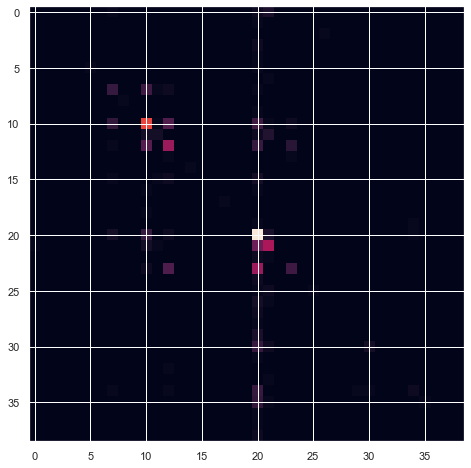

In [39]:
fig,ax = plt.subplots(figsize = (13,8))
ax.imshow(cm)

## **How the features relate with each other**

In [40]:
feature = songs.drop(['artist','song','genre'],axis = 1).corr()
feature[:5]

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418


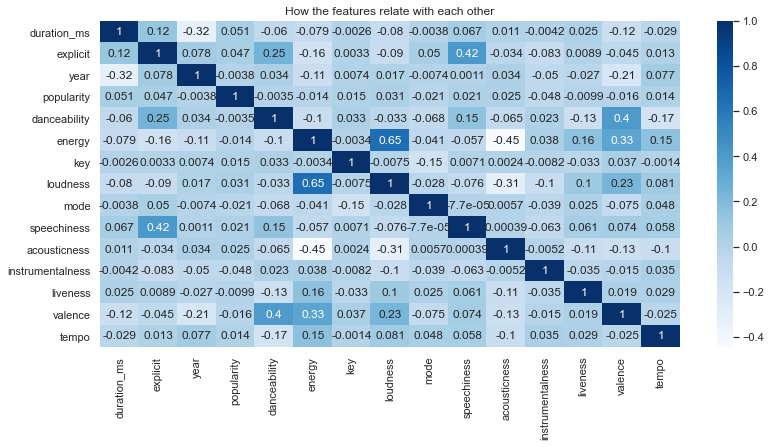

In [51]:
fig,ax= plt.subplots(figsize = (13,6))
sns.heatmap(feature, cmap = 'Blues',annot = True)
ax.set(title = 'How the features relate with each other');

## **Findings**
1. strong correlation between energy and loudness
2. strong correlation between explicit and speechiness
3. strong correlation between valence and danceabilty

## **Popularity by Genre**

[Text(0.5, 0, 'popularity'), Text(0, 0.5, 'genre')]

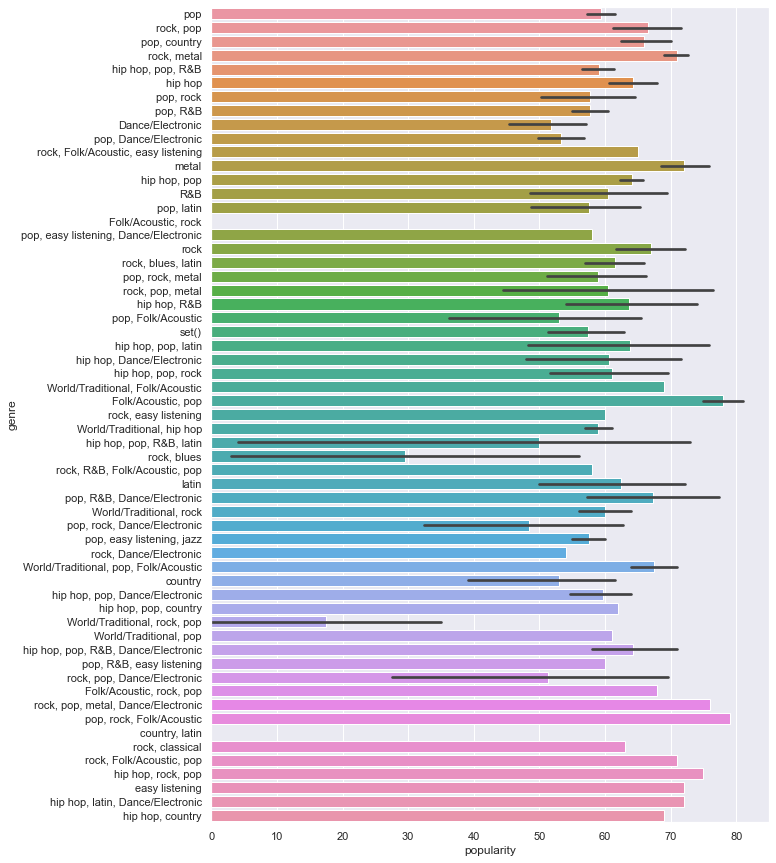

In [42]:
fig,ax = plt.subplots(figsize = (10,15))
sns.barplot(data = songs, y = songs.genre , x=songs.popularity)
ax.set(xlabel = 'popularity', ylabel = 'genre')

## **Number of songs by explicit content**

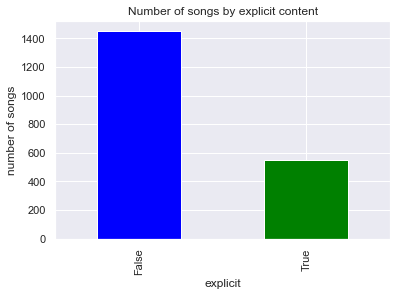

In [43]:
songs.loc[:,'explicit'].value_counts().plot(kind = 'bar'\
    , title ='Number of songs by explicit content', xlabel \
= 'explicit', ylabel = 'number of songs', color =['blue', 'green']);

## **Number of songs by Artist**

In [44]:
ns = songs.loc[:,['song','artist']]
ns =ns.groupby('artist').count().sort_values('song', ascending = False)[:10]
ns

,song
artist,
Rihanna,25
Drake,23
Eminem,21
Calvin Harris,20
Britney Spears,19
David Guetta,18
Kanye West,17
Chris Brown,17
Taylor Swift,16


## **Artist By popularity**

In [45]:
ps = songs.loc[:,['artist','song', 'popularity']].groupby('artist').mean().sort_values('popularity',ascending = False).head(10)
ps.head()

,popularity
artist,
Tom Odell,88.0
The Neighbourhood,87.0
WILLOW,86.0
Gesaffelstein,84.0
Lewis Capaldi,84.0


<AxesSubplot:xlabel='artist', ylabel='song'>

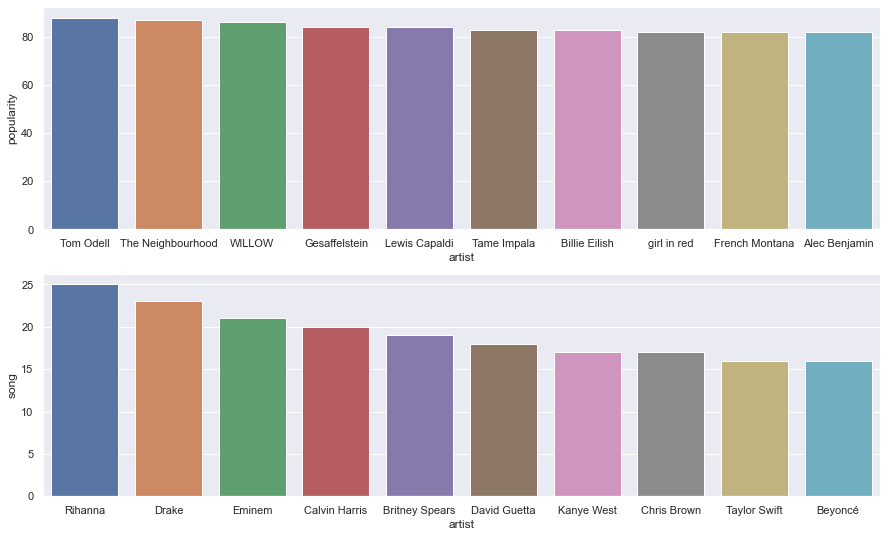

In [46]:
sns.set()
fig,ax = plt.subplots(2,1, figsize = (15,9))
sns.barplot(data = ps, x = ps.index ,y = ps.popularity, ax=ax[0])
sns.barplot(data= ns, x = ns.index , y= ns.song,ax=ax[1])